<a href="https://colab.research.google.com/github/Mmbsaksd/Ukraine-Vs-Russia-Sentimental-Analysis/blob/main/Ukraine_Russia_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [15]:
#Loading the dataset
df = pd.read_csv('/content/filename.csv')
print(df.head())

                    id      conversation_id               created_at  \
0  1507816096509927428  1507805134541058051  2022-03-26 20:25:45 UTC   
1  1507816094475685899  1073469112276398080  2022-03-26 20:25:45 UTC   
2  1507816093460545540  1506950291974983684  2022-03-26 20:25:45 UTC   
3  1507816091900387328  1507812926148812800  2022-03-26 20:25:44 UTC   
4  1507816090751193089  1507813638584811525  2022-03-26 20:25:44 UTC   

         date      time  timezone              user_id       username  \
0  2022-03-26  20:25:45         0            200871081         jbrtan   
1  2022-03-26  20:25:45         0             82820425  strongbowspub   
2  2022-03-26  20:25:45         0   980139160823521280     itsameuhhh   
3  2022-03-26  20:25:44         0            605893893         z12z21   
4  2022-03-26  20:25:44         0  1486457281193689094        avici_m   

            name  place  ... geo source user_rt_id user_rt retweet_id  \
0      joe brtan    NaN  ... NaN    NaN        NaN     

In [16]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [31]:
#Creating  dataframe with required table
df_1 = df[["username","tweet","language"]]
df_1.head()

,username,tweet,language
0,jbrtan,@LakotaMan1 @MayoIsSpicyy They've said they'd ...,en
1,strongbowspub,@NKozev @TIMGOLDFINCH @UndercoverDane @Shaytan...,en
2,itsameuhhh,@Lachmusstest @Romanische0501 @KyivIndependent...,en
3,z12z21,@CarolineGlick The White House correction bear...,en
4,avici_m,12/Pro tips: https://t.co/UG7RO0NBO3 attenti...,en


In [18]:
#Checking whethere is null value
df_1.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [19]:
#Checking how many language tweet are posted
df_1.language.value_counts()

en     8730
it      483
pt      298
und     167
in       52
ru       42
fr       39
es       36
ca       25
de       18
pl       16
ar       14
tr       13
bg        8
fi        8
nl        7
zh        6
el        6
cs        6
th        6
uk        5
ro        4
ja        4
hi        3
tl        3
cy        1
no        1
sv        1
sl        1
da        1
gu        1
kn        1
lv        1
et        1
hu        1
Name: language, dtype: int64

In [23]:
#Defining the variable for cleaning tweet
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
#Defining Function for cleaning data
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('http?://\S+|WWW\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text )
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  text = [word for word in text.split(' ')]
  text = ' '.join(text)

In [33]:
#Cleaning data with with defined function clean
df_1['tweet'] = df_1['tweet'].apply(clean)
df_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,username,tweet,language
0,jbrtan,None,en
1,strongbowspub,None,en
2,itsameuhhh,None,en
3,z12z21,None,en
4,avici_m,None,en
...,...,...,...
10004,magmell82,None,en
10005,angelwolf71885,None,en
10006,violetrenee6,None,und
10007,caswin22,None,en


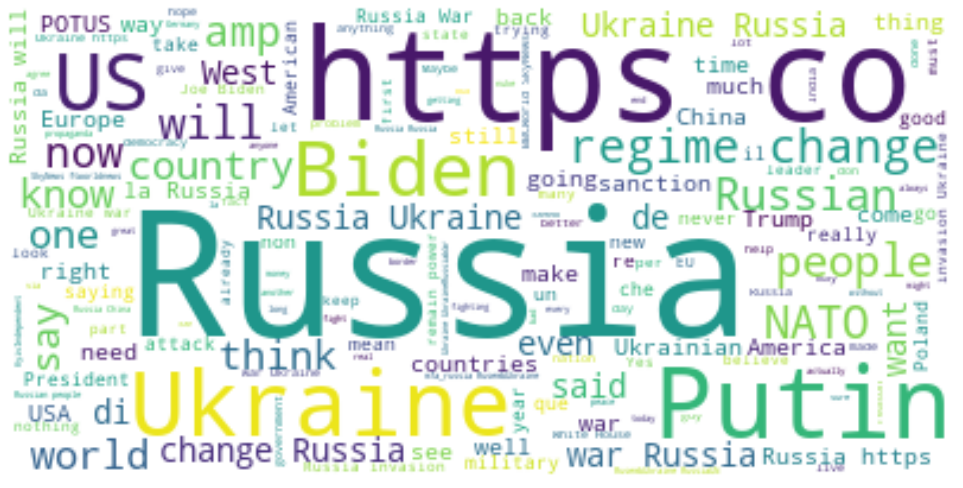

In [32]:
#Plotting wordcloud
text = " ".join(i for i in df_1.tweet)
stopword = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopword,background_color = 'white').generate(text)
plt.figure(figsize=(17,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [30]:
df_1

,username,tweet,language
0,jbrtan,None,en
1,strongbowspub,None,en
2,itsameuhhh,None,en
3,z12z21,None,en
4,avici_m,None,en
...,...,...,...
10004,magmell82,None,en
10005,angelwolf71885,None,en
10006,violetrenee6,None,und
10007,caswin22,None,en
